In [34]:
%load_ext watermark
%watermark

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
Last updated: 2021-04-21T20:39:17.415930+02:00

Python implementation: CPython
Python version       : 3.9.2
IPython version      : 7.21.0

Compiler    : Clang 12.0.0 (clang-1200.0.32.29)
OS          : Darwin
Release     : 20.3.0
Machine     : x86_64
Processor   : i386
CPU cores   : 4
Architecture: 64bit



In [36]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
plt.rcParams['figure.figsize'] = (10,10) # 10inch width and height for all plots

### Data Reading

In [37]:
vehicles = pd.read_pickle("../data/vehicles.3.clustered_variables.pkl")

In [38]:
vehicles.dtypes

manufacturer                 object
model                        object
year                          int64
displ                       float64
cylinders                   float64
transmission                 object
drive_wheels                 object
Class                      category
fuelType                     object
consumption                   int64
CO2_emissions               float64
drive                      category
types_motor_size           category
types_consumption          category
co2_type                   category
consumption_litres_mile     float64
dtype: object

### Distribution numerical variables  

We can use histograms to see the distribution of a variable

In [39]:
vehicles['transmission'].value_counts()

Automatic      24934
Manual         11851
Auto(AM-S6)        1
Name: transmission, dtype: int64

Optionally, we can perform a KDE, or Kernel Density Estimate, which performs an estimated function of the distribution of the variable  

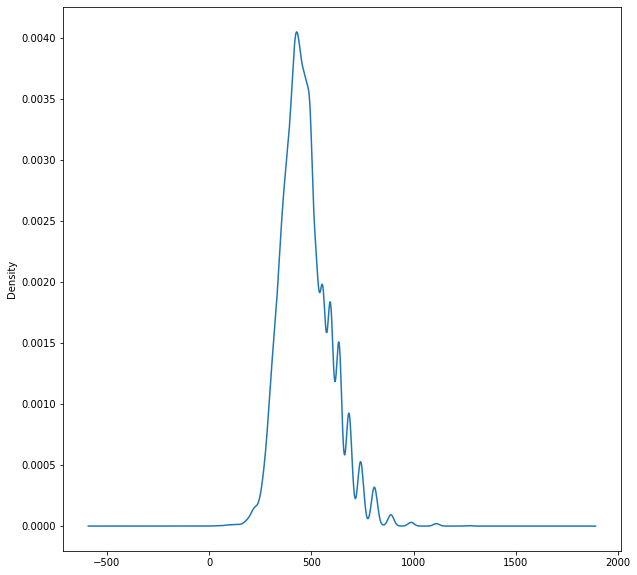

In [40]:
vehicles['CO2_emissions'].plot.kde();

In [41]:
def numerical_variable_distribution(df, col):
    df[col].plot.kde()
    plt.xlabel('Distribution of the variable {}'.format(col))
    plt.show()

Installing pywidgets will enable to analize the distributions more comfortably. It makes sense to perform such graphics only for numerical variables.
The pandas.select_dtypes method returns those columns of a specific type. 

In [42]:
numerical_columns = vehicles.select_dtypes(['int64', 'float64']).columns

In [43]:
from ipywidgets import interact, fixed

In [45]:
interact(numerical_variable_distribution, col=numerical_columns, df=fixed(vehicles));

interactive(children=(Dropdown(description='col', options=('year', 'displ', 'cylinders', 'consumption', 'CO2_e…

The variable cylinders, despite of being numerical, it does not follow a balanced distribution

In [46]:
vehicles['cylinders'].value_counts(normalize=True)

4.0     0.381205
6.0     0.350758
8.0     0.220328
5.0     0.020116
12.0    0.015631
3.0     0.006252
10.0    0.004132
2.0     0.001359
16.0    0.000217
Name: cylinders, dtype: float64

In [47]:
from scipy import stats 

In [48]:
def numerical_variable_normality(col):
    stats.probplot(vehicles[col], plot=plt)
    plt.xlabel('Probability diagram (normal) of the variable {}'.format(col))
    plt.show()

In [49]:
interact(numerical_variable_normality, col=numerical_columns);

interactive(children=(Dropdown(description='col', options=('year', 'displ', 'cylinders', 'consumption', 'CO2_e…

It seems they follow a normal distribution, but it is recommended to perform a normality test. What we pretend here is, to reject the null hyptohesis which states the variable to be analized has been obtained from a population that follows a normal. For a level of significance of 95%, we will reject the null hypothesis if the p-value is minor than 0.05. In other words, si the P-value obtained is less than 0.05, means the probability of null hypothesis to be true is so low (less than 5%) we can reject it

In [50]:
for num_col in numerical_columns:
    _, pval = stats.normaltest(vehicles[num_col])
    if(pval < 0.05):
        print("Column: {} does not follow a normal distribution".format(num_col))

Column: year does not follow a normal distribution
Column: displ does not follow a normal distribution
Column: cylinders does not follow a normal distribution
Column: consumption does not follow a normal distribution
Column: CO2_emissions does not follow a normal distribution
Column: consumption_litres_mile does not follow a normal distribution


So, any variable follows a right normal distribution 

### Categorical distribution variables

The pandas.value_counts function is widely used check how the variables are distributing. The former function returns the number of existent records for each column.

In [51]:
def categorical_variable_distribution(col):
    vehicles[col].value_counts(ascending=True, normalize=True).tail(20).plot.barh()
    plt.show()

In [52]:
categorical_columns = vehicles.select_dtypes(['object', 'category']).columns

In [53]:
interact(categorical_variable_distribution, col=categorical_columns);

interactive(children=(Dropdown(description='col', options=('manufacturer', 'model', 'transmission', 'drive_whe…

### Conclusions

· Any variable follows a normal distribution
· The numerical variable cylinders has an unbalanced discrete variable (number of cylinders 2, 4 and 8 su ups to 95% of the vehicles). It could be grouped as categorical variable (2,4,8 and other)
·Largest manufacturer is Chevrolet (10% of total volume)
· 65% vehicles use normal gasoline
· 'Motor size' and 'co2' is balance along the whole range
· 70% of vehicles are two-wheel drive
· Two thirds of the cars has automatic transmission
· The most common class of vehicles is 'small cars' with 35% over total
· The largest car manufacturers in regards the cars analyzed are from the US. It makes sence since the EPA is the american agency and it will be more interested on the analysis of US cars.